# Python Data Visualization Practice

Practice plotting with `matplotlib`.

**1. Import the usual data science libraries.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**2. Read the sports dataset (`./data/sports.csv`) into a DataFrame.**

The data is from [this source](https://news.gallup.com/poll/4735/sports.aspx#1) and contains information on the percent of people who say various sports are their favorite to watch.

In [7]:
sports_ds = pd.read_csv("data/sports.csv")
sports_ds.head(10)

,Year,Football,Basketball,Baseball,Soccer,Ice hockey,Auto racing,Tennis,Golf,Volleyball,...,Ice/Figure skating,Rodeo,Track and field,Fishing,Swimming,Wrestling,Bowling,Other,None,No opinion
0,2017,37,11,9,7,4,2,2,1,1,...,1,0,0,0,0,0,0,5,15,0
1,2013,39,12,14,4,3,2,3,2,0,...,1,0,1,1,0,0,0,4,11,0
2,2008,41,9,10,3,4,3,1,2,1,...,1,0,0,0,0,0,0,6,14,0
3,2007,43,11,13,2,4,3,1,2,0,...,2,0,0,0,0,1,0,3,12,1
4,2006,43,12,11,2,2,4,1,3,0,...,3,0,0,0,0,0,0,3,12,0
5,2005,34,12,12,3,4,5,3,2,1,...,3,1,0,1,0,1,0,4,13,0
6,2004,37,13,10,2,3,5,2,2,0,...,4,1,0,0,0,1,0,4,12,1


**3. Take a peak and get basic information about the dataset.**

In [5]:
sports_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                7 non-null      int64
 1   Football            7 non-null      int64
 2   Basketball          7 non-null      int64
 3   Baseball            7 non-null      int64
 4   Soccer              7 non-null      int64
 5   Ice hockey          7 non-null      int64
 6   Auto racing         7 non-null      int64
 7   Tennis              7 non-null      int64
 8   Golf                7 non-null      int64
 9   Volleyball          7 non-null      int64
 10  Boxing              7 non-null      int64
 11  Gymnastics          7 non-null      int64
 12  Motocross           7 non-null      int64
 13  Ice/Figure skating  7 non-null      int64
 14  Rodeo               7 non-null      int64
 15  Track and field     7 non-null      int64
 16  Fishing             7 non-null      int64
 17  S

In [6]:
sports_ds.describe()

,Year,Football,Basketball,Baseball,Soccer,Ice hockey,Auto racing,Tennis,Golf,Volleyball,...,Ice/Figure skating,Rodeo,Track and field,Fishing,Swimming,Wrestling,Bowling,Other,None,No opinion
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.000000,7.000000,7.000000
mean,2008.571429,39.142857,11.428571,11.285714,3.285714,3.428571,3.428571,1.857143,2.00000,0.428571,...,2.142857,0.285714,0.142857,0.285714,0.0,0.428571,0.0,4.142857,12.714286,0.285714
std,4.720775,3.387653,1.272418,1.799471,1.799471,0.786796,1.272418,0.899735,0.57735,0.534522,...,1.214986,0.487950,0.377964,0.487950,0.0,0.534522,0.0,1.069045,1.380131,0.487950
min,2004.000000,34.000000,9.000000,9.000000,2.000000,2.000000,2.000000,1.000000,1.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.000000,11.000000,0.000000
25%,2005.500000,37.000000,11.000000,10.000000,2.000000,3.000000,2.500000,1.000000,2.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.500000,12.000000,0.000000
50%,2007.000000,39.000000,12.000000,11.000000,3.000000,4.000000,3.000000,2.000000,2.00000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,4.000000,12.000000,0.000000
75%,2010.500000,42.000000,12.000000,12.500000,3.500000,4.000000,4.500000,2.500000,2.00000,1.000000,...,3.000000,0.500000,0.000000,0.500000,0.0,1.000000,0.0,4.500000,13.500000,0.500000
max,2017.000000,43.000000,13.000000,14.000000,7.000000,4.000000,5.000000,3.000000,3.00000,1.000000,...,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,6.000000,15.000000,1.000000


## Time to make some plots

**4. Plot the percentage of people that say soccer is their favorite sport over time. Give this plot a descriptive title and axis labels. Interpret this plot - what information/insight do you get from this plot?**

In [32]:
sports_ds["Total"] = sports_ds.iloc[:, 1:].sum(axis=1)
sports_ds.head()

,Year,Football,Basketball,Baseball,Soccer,Ice hockey,Auto racing,Tennis,Golf,Volleyball,...,Rodeo,Track and field,Fishing,Swimming,Wrestling,Bowling,Other,None,No opinion,Total
0,2017,37,11,9,7,4,2,2,1,1,...,0,0,0,0,0,0,5,15,0,196
1,2013,39,12,14,4,3,2,3,2,0,...,0,1,1,0,0,0,4,11,0,196
2,2008,41,9,10,3,4,3,1,2,1,...,0,0,0,0,0,0,6,14,0,196
3,2007,43,11,13,2,4,3,1,2,0,...,0,0,0,0,1,0,3,12,1,200
4,2006,43,12,11,2,2,4,1,3,0,...,0,0,0,0,0,0,3,12,0,198


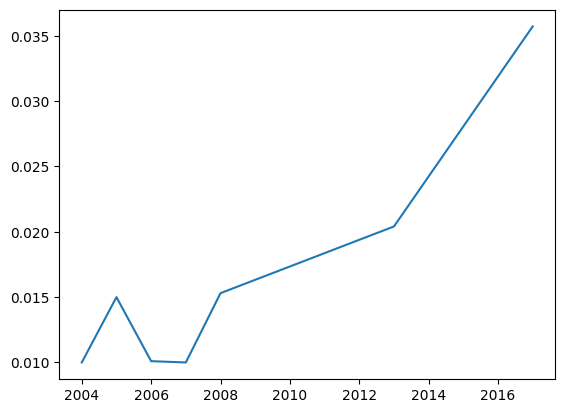

In [33]:
plt.plot(sports_ds['Year'], sports_ds['Soccer']/sports_ds["Total"])


> **Interpretation:** 

**4. Plot a bar chart of all of the sports and the percentage of people who say that was their favorite sport in 2017. Give this plot a descriptive title and axis labels. Interpret this plot - what information/insight do you get from this plot?**

*Hint:* You may need to access the column names here!

In [39]:
sports_ds.columns[1:-4]

Index(['Football', 'Basketball', 'Baseball', 'Soccer', 'Ice hockey',
       'Auto racing', 'Tennis', 'Golf', 'Volleyball', 'Boxing', 'Gymnastics',
       'Motocross', 'Ice/Figure skating', 'Rodeo', 'Track and field',
       'Fishing', 'Swimming', 'Wrestling', 'Bowling'],
      dtype='object')

In [46]:
normalized_frequencies = sports_ds.iloc[0, 1:-4]/sports_ds.iloc[0,-1]

<BarContainer object of 19 artists>

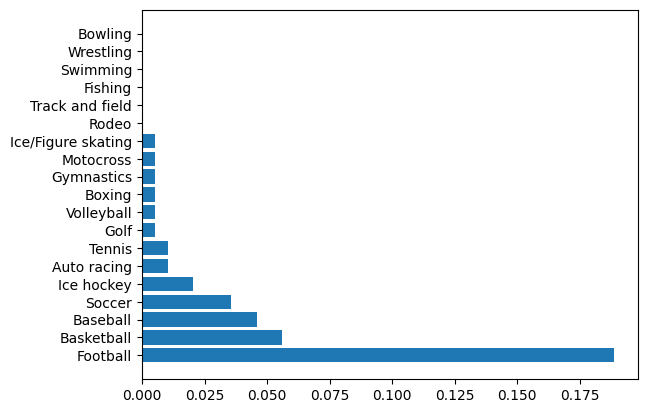

In [47]:
plt.barh(sports_ds.columns[1:-4], normalized_frequencies)

> **Interpretation:** 

**Bonus**: Sort the above plot so that the bars are in descending order (highest percentage/largest bar to lowest percentage/smallest bar). Make sure the labels match up!

**5. Advanced: Graph the popularity over time of two different sports on the same plot. Give this plot a descriptive title and axis labels. Make this plot look as visually appealing as possible. Interpret this plot - what information/insight do you get from this plot?**

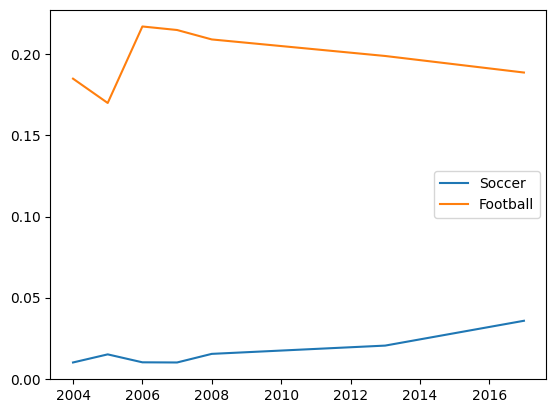

In [50]:
plt.plot(sports_ds['Year'], sports_ds['Soccer']/sports_ds["Total"], label="Soccer")
plt.plot(sports_ds['Year'], sports_ds['Football']/sports_ds["Total"], label="Football")
plt.legend()

> **Interpretation:** 